**Student id**: 6410422016

**Name**: Chotika Boonthaweechok

**Nickname**: Ploy

**Rank**: 1

**Public Score**: 0.99257

**Private Score**: 0.98933

**Model**: QuadraticDiscriminantAnalysis


# **💙 Introduction**

This was my work to competition for my class. The data are about binary classification. This work represents a deeper analysis by playing on several parameters. I will do a lot of work. You can follow this and let's go. 

The following kernel contains the steps enumerated below for assessing the dataset:

1. [Import data and python packages](#t1.)
2. [Cleaning data](#t2.)
3. [Data exploration after cleaning data](#t3.)
4. [Feature Selection](#t4.)
5. [Model section](#t5.)
6. [Test and Submission](#t6.)

<a id="t1."></a>
# ❤️  1. Import Data & Python Packages

In [1]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

# machine learning only sklearn for this rule
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Acquire data

Start by acquiring the training, testing and submission datasets into Pandas DataFrames.

The several key items in this folder:

* train.csv: CSV file containing training set and labels (including y value)
* test.csv: CSV file containing testing set and labels (not including y value)
* sampleSubmission.csv: CSV file that we should input predict data to this file

In [2]:
# Read CSV train data file into DataFrame
df_train = pd.read_csv('/kaggle/input/dads6003-in-class-competition/train.csv')

# Read CSV test data file into DataFrame
df_test = pd.read_csv('/kaggle/input/dads6003-in-class-competition/test.csv')

# Read CSV submission file
submission = pd.read_csv('/kaggle/input/dads6003-in-class-competition/sampleSubmission.csv')

## Analyze by describing data

Going to display five data sample for training and testing dataset. There train data is 7500 observations with 21 features (x1-x20 and y). These test data is 2500 observations with 20 features (x1-x20). All data are within numerical features (mean variables for which the values are numbers). x1 - x20 are float64 but y is int64.

In [3]:
# preview train data
df_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,-10.731014,-166.447703,57.634618,5.851483,6.443051,773.535357,-425.516507,19.541551,102333.24180,37.515512,...,1.177903,4531.019914,65.320993,10.856422,42.317769,215.727832,9.922942,194.151039,-4.580311,0
1,-11.357862,-175.583196,61.413742,4.957525,6.022880,592.665369,-154.993322,17.165756,56410.00878,33.667832,...,6.288225,5745.900235,124.629610,19.519498,37.481917,193.590955,10.280823,159.152326,-4.361565,0
2,-19.008191,-266.301983,43.228042,5.173549,5.569678,912.741203,-337.001477,18.362978,37204.35472,24.194495,...,5.241047,5369.285274,136.536890,16.824492,31.761223,195.816664,9.604161,148.690528,-5.322491,1
3,-16.849847,-228.458742,45.440429,6.267129,4.125443,834.109486,-297.096954,16.375756,54967.23130,20.578061,...,2.316119,NaN,118.295834,19.972844,51.722932,210.446677,8.108592,310.539447,-5.205344,0
4,-11.518749,-345.861627,37.470283,6.178874,5.527774,634.255353,-243.072126,16.785630,62397.51981,39.815572,...,5.366404,6161.928292,61.414626,15.990853,51.659323,203.356424,12.552922,241.868249,-4.889072,1


In [4]:
print('There df_train is {} observations with {} features'.format(df_train.shape[0], df_train.shape[1]))

There df_train is 7500 observations with 21 features


In [5]:
# preview test data
df_test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,-14.880285,-413.657030,17.037929,5.627481,6.262187,704.164878,-269.815659,13.503896,60805.03782,31.065906,5.625478,5.150013,6282.637653,174.281276,19.959450,32.278906,206.323118,8.337124,232.140628,-5.120450
1,-13.987087,-235.197680,53.670585,4.743702,4.670301,1226.941573,-184.656449,7.034055,55445.68723,15.189238,15.746002,3.880180,3759.028105,32.216142,17.054081,35.934156,191.790254,10.985527,267.024627,-5.200961
2,-11.764850,-192.880170,38.687566,5.606648,4.147060,940.690132,-182.564985,17.218596,31562.61815,34.769586,12.766144,4.885215,6722.719526,181.736690,20.479688,33.809666,166.718488,7.087623,115.762593,-6.080712
3,-10.790193,-204.849932,50.837951,5.934410,5.310772,794.581702,-245.911853,9.936746,47299.76010,25.565751,14.068207,7.156563,5651.188202,127.570137,20.904829,49.857911,139.872041,9.597151,213.574163,-6.355565
4,-17.113392,-141.457819,53.246627,5.939751,5.631022,543.441438,-302.081360,21.861266,66725.53006,34.796947,13.834198,4.743589,5376.558510,119.269139,19.826086,39.903060,311.541001,12.573611,263.709173,-4.329967


In [6]:
print('There df_test is {} observations with {} features'.format(df_test.shape[0], df_test.shape[1]))

There df_test is 2500 observations with 20 features


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7391 non-null   float64
 1   x2      7466 non-null   float64
 2   x3      7444 non-null   float64
 3   x4      7407 non-null   float64
 4   x5      7440 non-null   float64
 5   x6      7382 non-null   float64
 6   x7      7419 non-null   float64
 7   x8      7365 non-null   float64
 8   x9      7500 non-null   float64
 9   x10     7421 non-null   float64
 10  x11     7483 non-null   float64
 11  x12     7488 non-null   float64
 12  x13     7370 non-null   float64
 13  x14     7376 non-null   float64
 14  x15     7393 non-null   float64
 15  x16     7407 non-null   float64
 16  x17     7375 non-null   float64
 17  x18     7480 non-null   float64
 18  x19     7355 non-null   float64
 19  x20     7374 non-null   float64
 20  y       7500 non-null   int64  
dtypes: float64(20), int64(1)
memory usage

In [8]:
cols = ['x1','x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20']
x_train = df_train[cols]
y_train = df_train['y']
df_train[cols].describe(include = 'all')

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
count,7391.000000,7466.000000,7444.000000,7407.000000,7440.000000,7382.000000,7419.000000,7365.000000,7500.000000,7421.000000,7483.000000,7488.000000,7370.000000,7376.000000,7393.000000,7407.000000,7375.000000,7480.000000,7355.000000,7374.000000
mean,-14.968355,-225.221402,43.881855,5.011837,5.000313,747.260313,-301.412577,18.022226,54976.184397,30.205776,12.517717,3.989506,4980.754126,119.932257,16.416643,39.940365,201.071874,9.989558,253.723195,-5.011305
std,2.988404,84.285854,15.143164,0.976388,1.003350,249.253074,87.990472,5.060680,19537.797954,8.062984,2.498150,1.783844,997.767816,33.381818,5.615822,7.974831,40.675391,1.951504,50.682702,0.983928
min,-26.927722,-624.653252,-10.267461,0.735394,0.477509,-195.823833,-628.442832,-5.428193,-17829.881370,0.331504,2.977507,-3.003061,1184.208527,-19.548508,-8.185806,9.690014,33.155239,2.461842,54.792614,-8.568794
25%,-16.979950,-270.529016,33.801932,4.361544,4.314655,578.359935,-360.089533,14.661261,42118.143668,24.791255,10.834321,2.805723,4304.897615,97.161534,12.924786,34.585579,173.529290,8.706041,219.374190,-5.671620
50%,-14.976339,-216.805558,44.449349,5.020168,5.009823,744.383078,-299.838766,18.081437,55645.293455,30.119152,12.495209,4.005061,4994.244504,120.236974,16.738817,40.019605,201.277755,9.991678,253.551730,-5.011579
75%,-12.947586,-168.963819,54.265231,5.674351,5.678090,910.955847,-241.908103,21.350585,68519.592863,35.621576,14.213211,5.161177,5644.037452,142.391308,20.312328,45.375396,228.361639,11.316860,288.184481,-4.361536
max,-3.829402,37.543107,95.317156,8.439056,8.623321,1748.660648,84.687849,37.603060,116364.508600,59.280488,22.428777,11.824146,8972.429051,231.576019,35.623238,68.438686,348.124801,18.477174,446.767201,-1.054174


In [9]:
df_test.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,-15.019192,-223.703002,44.197512,4.973311,4.995670,751.476367,-297.260678,18.064720,54776.929687,29.944481,12.450236,3.978976,4991.479557,119.810376,16.502266,40.085369,199.836185,10.011791,254.189484,-4.967937
std,2.990989,85.379118,14.900128,1.003423,1.007525,243.071143,90.030466,5.161659,18897.074138,7.937230,2.520782,1.783597,975.777683,33.144780,5.748280,8.033738,39.849219,1.977438,49.937679,0.989577
min,-25.584518,-629.580529,-9.489057,1.390544,1.792207,-369.368139,-695.821044,0.569276,-15630.800070,7.065782,4.100528,-4.277049,1928.476116,3.508190,-7.997347,13.730905,66.254148,3.531700,77.261698,-8.185745
25%,-17.028191,-271.235090,34.579333,4.307586,4.300803,587.103806,-357.433160,14.676345,41771.151827,24.545187,10.821263,2.843329,4303.843184,97.980545,13.101582,34.623011,173.114354,8.713956,221.824099,-5.654060
50%,-15.058222,-213.550050,44.927951,4.958169,5.006650,749.915697,-298.326099,18.067417,54825.607105,29.892126,12.374751,3.983836,5026.291516,119.540172,16.825135,39.930805,200.307405,10.009507,254.185089,-4.955244
75%,-12.984159,-165.823023,54.382023,5.659207,5.678858,911.937706,-237.578305,21.601625,67855.678365,35.345116,14.107796,5.149365,5667.971323,142.202998,20.366057,45.688910,226.203809,11.318970,288.315446,-4.298929
max,-4.022392,122.002658,95.426114,8.209714,8.858376,1557.710418,-42.968843,35.270084,111183.738500,63.247057,21.404332,10.176599,8735.027551,257.004312,32.870552,67.735770,330.487154,17.240497,426.121242,-1.412618


<a id="t2."></a>
# ❤️  2. Cleaning data

1) **Checking for outlier**: The outlier is is the value which is out of the range. If I didn't clean this value, mean and Standard Deviation won't correctly. Outlier detection have a several methods but I will use "**IQR METHOD**" In this method by using Inter Quartile Range(IQR), which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers. I will drop outlier on the training data 

In [10]:
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    print(f"Lower_tail: {Lower_tail}")
    print(f"Upper_tail: {Upper_tail}")
    print("\n")

In [11]:
cols = ['x1','x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20']
for x in cols:
    print(x)
    iqr_outliers(df_train[x])

x1
Lower_tail: -23.028496747499997
Upper_tail: -6.899039767500002


x2
Lower_tail: -422.87681006250006
Upper_tail: -16.61602476249996


x3
Lower_tail: 3.1069829375000104
Upper_tail: 84.96017941749999


x4
Lower_tail: 2.3923348597499996
Upper_tail: 7.64356002175


x5
Lower_tail: 2.269501245124998
Upper_tail: 7.7232435701250015


x6
Lower_tail: 79.46606857499984
Upper_tail: 1409.8497135750001


x7
Lower_tail: -537.3616765749998
Upper_tail: -64.63595957500007


x8
Lower_tail: 4.627275825000002
Upper_tail: 31.384570104999998


x9
Lower_tail: 2515.969874999988
Upper_tail: 108121.76665500001


x10
Lower_tail: 8.545773954999998
Upper_tail: 51.867057515


x11
Lower_tail: 5.765985397499998
Upper_tail: 19.2815462175


x12
Lower_tail: -0.7274577066250001
Upper_tail: 8.694357346375


x13
Lower_tail: 2296.1878593750002
Upper_tail: 7652.747208375


x14
Lower_tail: 29.316874212499997
Upper_tail: 210.23596799250004


x15
Lower_tail: 1.8434734250000009
Upper_tail: 31.393640345


x16
Lower_tail: 18.4008

Plots x1


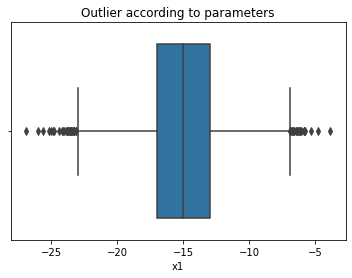

Plots x2


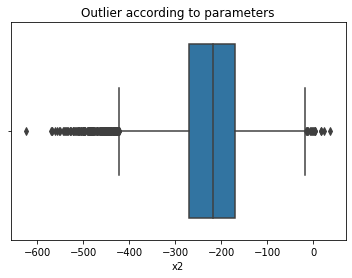

Plots x3


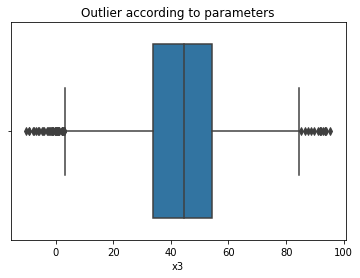

Plots x4


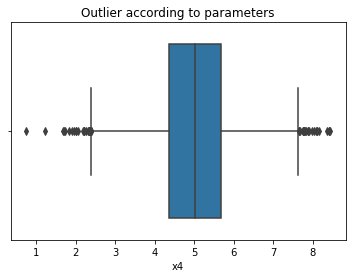

Plots x5


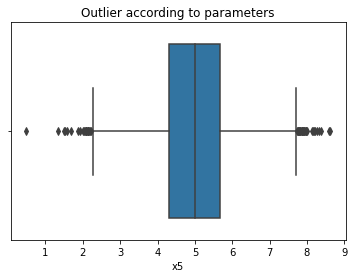

Plots x6


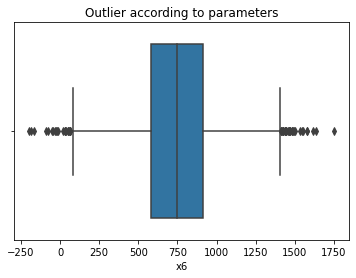

Plots x7


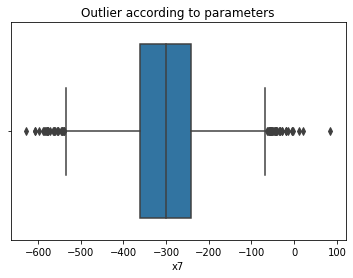

Plots x8


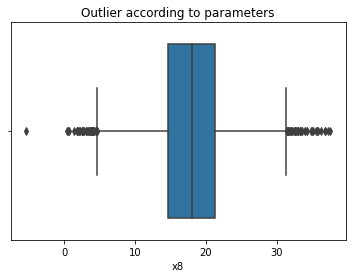

Plots x9


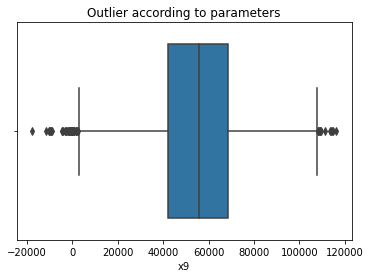

Plots x10


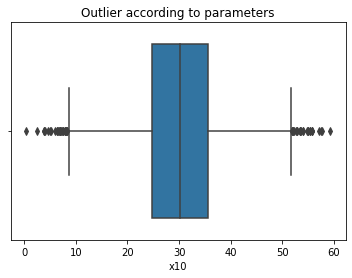

Plots x11


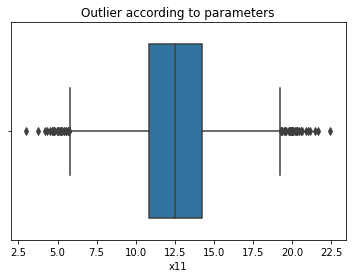

Plots x12


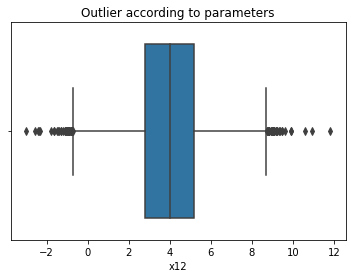

Plots x13


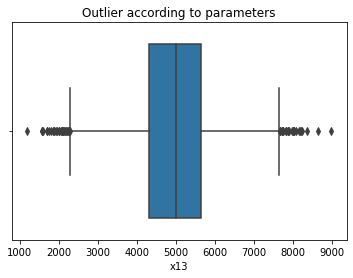

Plots x14


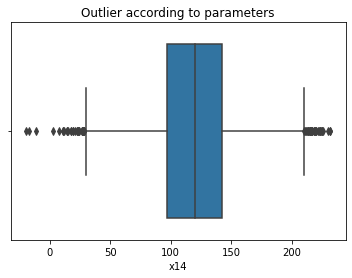

Plots x15


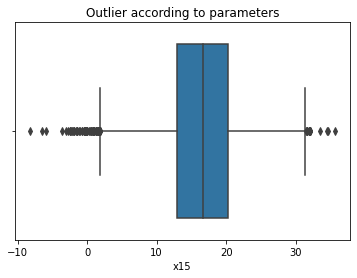

Plots x16


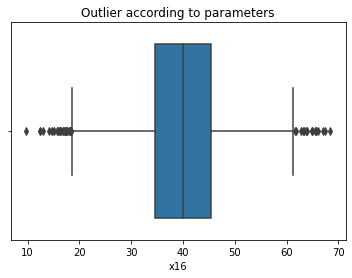

Plots x17


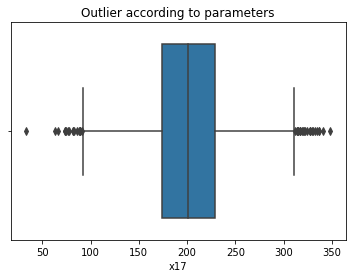

Plots x18


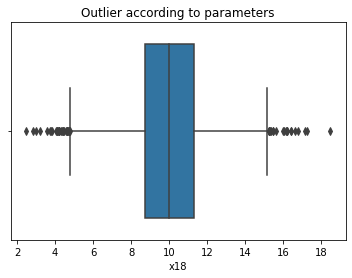

Plots x19


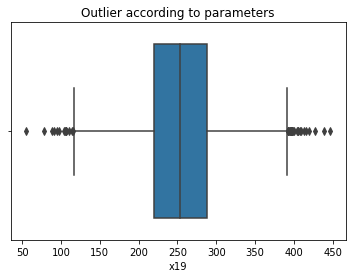

Plots x20


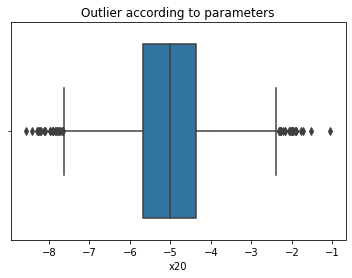

In [12]:
cols = ['x1','x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20']
for x in cols:
    print(f'Plots {x}')
    sns.boxplot(df_train[x])
    plt.title("Outlier according to parameters")
    plt.show()

**Actions**: Remove outlier on training data as below.

In [13]:
df_train = df_train.drop(df_train[df_train.x1 < -23.12294316].index)
df_train = df_train.drop(df_train[df_train.x1 > -6.9373999975].index)
df_train = df_train.drop(df_train[df_train.x2 < -422.980552].index)
df_train = df_train.drop(df_train[df_train.x2 > -16.61602476249996].index)
df_train = df_train.drop(df_train[df_train.x3 < 3.1069829375000104].index)
df_train = df_train.drop(df_train[df_train.x3 > 84.96017941749999].index)
df_train = df_train.drop(df_train[df_train.x4 < 2.3923348597499996].index)
df_train = df_train.drop(df_train[df_train.x4 > 7.64356002175].index)
df_train = df_train.drop(df_train[df_train.x5 < 2.269501245124998].index)
df_train = df_train.drop(df_train[df_train.x5 > 7.7232435701250015].index)
df_train = df_train.drop(df_train[df_train.x6 < 79.46606857499984].index)
df_train = df_train.drop(df_train[df_train.x6 > 1409.8497135750001].index)
df_train = df_train.drop(df_train[df_train.x7 < -537.3616765749998].index)
df_train = df_train.drop(df_train[df_train.x7 > -64.63595957500007].index)
df_train = df_train.drop(df_train[df_train.x8 < 4.627275825000002].index)
df_train = df_train.drop(df_train[df_train.x8 > 31.384570104999998].index)
df_train = df_train.drop(df_train[df_train.x9 < 2515.969874999988].index)
df_train = df_train.drop(df_train[df_train.x9 > 108121.76665500001].index)
df_train = df_train.drop(df_train[df_train.x10 < 8.545773954999998].index)
df_train = df_train.drop(df_train[df_train.x10 > 51.867057515].index)
df_train = df_train.drop(df_train[df_train.x11 < 5.765985397499998].index)
df_train = df_train.drop(df_train[df_train.x11 > 19.2815462175].index)
df_train = df_train.drop(df_train[df_train.x12 < -0.7274577066250001].index)
df_train = df_train.drop(df_train[df_train.x12 > 8.694357346375].index)
df_train = df_train.drop(df_train[df_train.x13 < 2296.1878593750002].index)
df_train = df_train.drop(df_train[df_train.x13 > 7652.747208375].index)
df_train = df_train.drop(df_train[df_train.x14 < 29.316874212499997].index)
df_train = df_train.drop(df_train[df_train.x14 > 210.23596799250004].index)
df_train = df_train.drop(df_train[df_train.x15 < 1.8434734250000009].index)
df_train = df_train.drop(df_train[df_train.x15 > 31.393640345].index)
df_train = df_train.drop(df_train[df_train.x16 < 18.400854194999997].index)
df_train = df_train.drop(df_train[df_train.x16 > 61.560120874999996].index)
df_train = df_train.drop(df_train[df_train.x17 < 91.280765875].index)
df_train = df_train.drop(df_train[df_train.x17 > 310.610162475].index)
df_train = df_train.drop(df_train[df_train.x18 < 4.789812958124999].index)
df_train = df_train.drop(df_train[df_train.x18 > 15.233088717125002].index)
df_train = df_train.drop(df_train[df_train.x19 < 116.15875480000007].index)
df_train = df_train.drop(df_train[df_train.x19 > 391.3999163999999].index)
df_train = df_train.drop(df_train[df_train.x20 < -7.63674662325].index)
df_train = df_train.drop(df_train[df_train.x20 > -2.39640915925].index)


In [14]:
print('There df_train after remove outlier is {} observations with {} features'.format(df_train.shape[0], df_train.shape[1]))

There df_train after remove outlier is 6398 observations with 21 features


2) **Checking for Missing value**: Only training data have missing value. I should handle missing value before training model. I can't train model like this. I will change null value to mean or median. All data expect x2 of mean and median are the same. So I will use only mean instead of median but for x2 I will use median because it's high standard deviation.

In [15]:
print('Train columns with null values:\n', df_train.isnull().sum())
print("-"*10)

Train columns with null values:
 x1      86
x2      28
x3      51
x4      77
x5      54
x6      99
x7      66
x8     116
x9       0
x10     66
x11     16
x12      9
x13    115
x14    108
x15     90
x16     80
x17    108
x18     19
x19    125
x20    108
y        0
dtype: int64
----------


<AxesSubplot:>

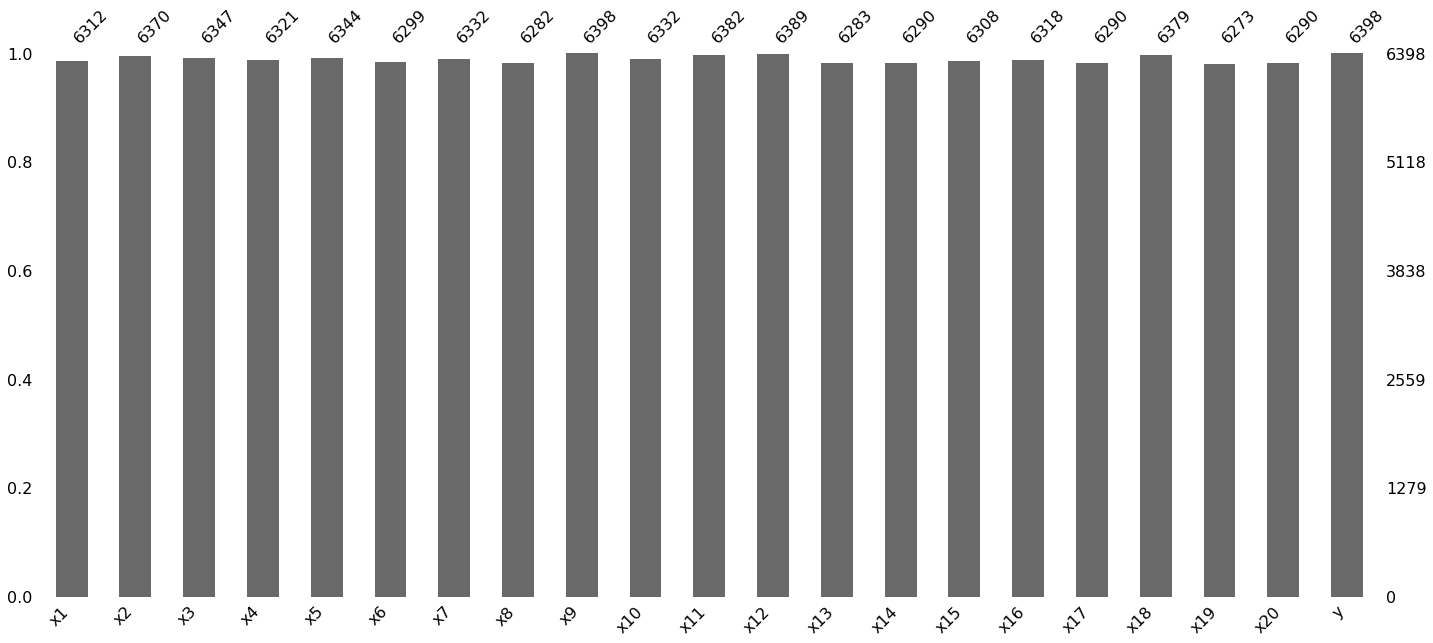

In [16]:
msno.bar(df_train) 

In [17]:
print('Test/Validation columns with null values:\n', df_test.isnull().sum())
print("-"*10)

Test/Validation columns with null values:
 x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
dtype: int64
----------


In [18]:
df_train[cols].agg(['mean','median', 'std'], axis="rows")

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
mean,-14.965665,-219.407733,44.353962,5.017360,5.001443,747.265782,-302.389644,18.084504,55782.009748,30.074442,12.519073,4.001145,4981.187424,119.292696,16.642086,39.968106,201.112902,9.968464,253.527913,-5.008594
median,-14.997618,-214.705316,44.849968,5.018729,5.009957,744.859494,-300.498947,18.145106,56185.279755,30.026595,12.495794,4.002628,4993.905175,119.549510,16.860027,40.055951,201.334581,9.971251,253.190862,-4.999803
std,2.898563,74.333527,14.431041,0.947973,0.972049,239.549659,83.719540,4.745242,18441.001840,7.675527,2.395716,1.689617,965.848266,31.221690,5.258495,7.729507,39.796130,1.893442,49.468233,0.954884


In [19]:
df_train["x1"].fillna(df_train["x1"].mean(), inplace = True)
df_train["x2"].fillna(df_train["x2"].median(), inplace = True)
df_train["x3"].fillna(df_train["x3"].mean(), inplace = True)
df_train["x4"].fillna(df_train["x4"].mean(), inplace = True)
df_train["x5"].fillna(df_train["x5"].mean(), inplace = True)
df_train["x6"].fillna(df_train["x6"].mean(), inplace = True)
df_train["x7"].fillna(df_train["x7"].mean(), inplace = True)
df_train["x8"].fillna(df_train["x8"].mean(), inplace = True)
df_train["x9"].fillna(df_train["x9"].mean(), inplace = True)
df_train["x10"].fillna(df_train["x10"].mean(), inplace = True)
df_train["x11"].fillna(df_train["x11"].mean(), inplace = True)
df_train["x12"].fillna(df_train["x12"].mean(), inplace = True)
df_train["x13"].fillna(df_train["x13"].mean(), inplace = True)
df_train["x14"].fillna(df_train["x14"].mean(), inplace = True)
df_train["x15"].fillna(df_train["x15"].mean(), inplace = True)
df_train["x16"].fillna(df_train["x16"].mean(), inplace = True)
df_train["x17"].fillna(df_train["x17"].mean(), inplace = True)
df_train["x18"].fillna(df_train["x18"].mean(), inplace = True)
df_train["x19"].fillna(df_train["x19"].mean(), inplace = True)
df_train["x20"].fillna(df_train["x20"].mean(), inplace = True)

<a id="t3."></a>
# ❤️  3. Data exploration

1.1.) Explore Deposit Result (0/1)

As graph, The zero value has more than the 1 value. It's almost 3 times of 1.

Number of 0:  5002
Number of 1 :  1396


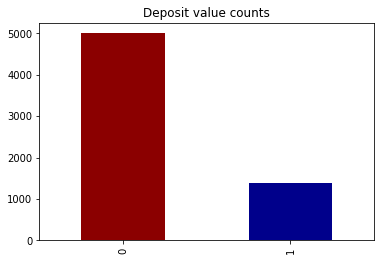

In [20]:
n, y = (df_train['y'].value_counts())
df_train['y'].value_counts().plot.bar(color=['darkred','darkblue'], title = 'Deposit value counts');
print('Number of 0: ',n)
print('Number of 1 : ',y)

<a id="t4."></a>
# ❤️  4. Feature Selection

We have many parameters on this data but need to analysis what is the important feature. If use all parameters, model won't get high accuracy and can't predict it. In the first, I will use Feature selection with correlation to select features.

**1. Feature selection with correlation**

* x6, x9, x14 are correlated with each other and I only use x9.
* x10, x15 are correlated with each other and I only use x15.

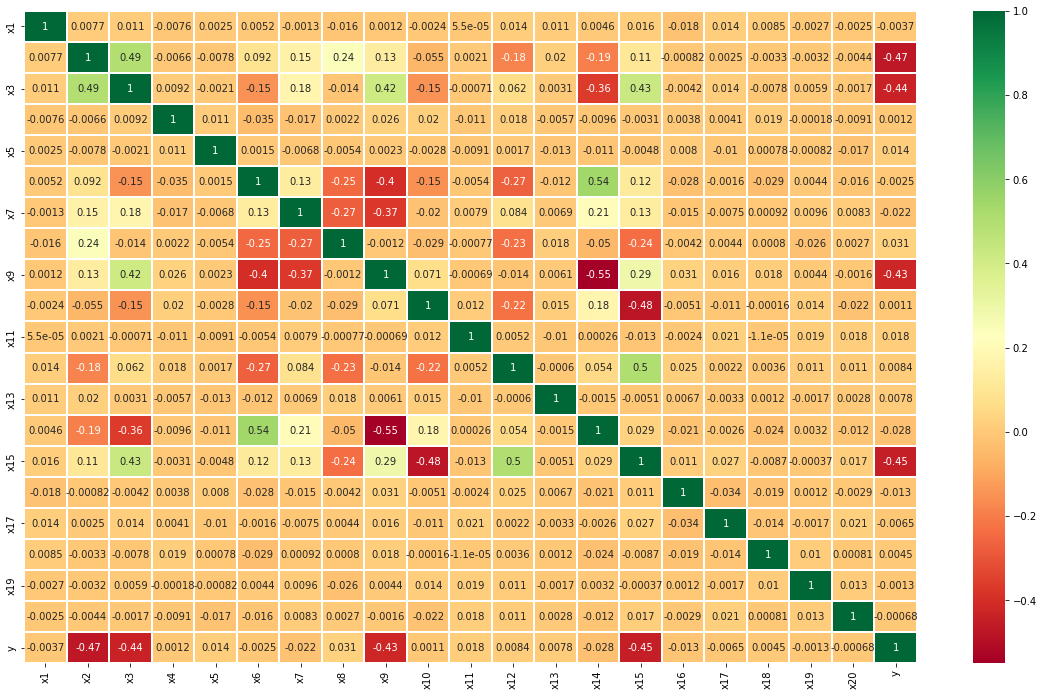

In [21]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

I will try to run model and see accuracy. I try to choose "random forest classification" first. Accuracy is almost 93% and as it can be seen in confusion matrix, we make few wrong prediction. Now lets see other feature selection methods to find better results.

In [22]:
colsSelect1 = ['x1','x2', 'x3','x4','x5','x6','x7','x8','x9','x11','x12','x13','x15','x16','x17','x18','x19','x20']

x_train = np.array(df_train[colsSelect1])                
y_train = np.array(df_train["y"]) 
x_test = np.array(df_test[colsSelect1]) 

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,test_size=0.3,random_state=1)
model=RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=3, n_estimators=900)
model.fit(x_train, y_train)
forest_pred = model.predict(x_test)
print('\n',confusion_matrix(y_test, forest_pred))
print('CLASSIFICATION REPORT FOR FEATURE SELECT1\n\n', classification_report(y_test, forest_pred))


 [[1470   53]
 [  71  326]]
CLASSIFICATION REPORT FOR FEATURE SELECT1

               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1523
           1       0.86      0.82      0.84       397

    accuracy                           0.94      1920
   macro avg       0.91      0.89      0.90      1920
weighted avg       0.93      0.94      0.93      1920



**2. Feature Importances**

For feature importance, I choose "colsSelect2" value and f1-score with weighted avg is '0.97'. It's more than Feature selection with correlation.

In [24]:
colsSelect2 = ['x1','x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20']
x_train = np.array(df_train[colsSelect2])                
y_train = np.array(df_train["y"])   

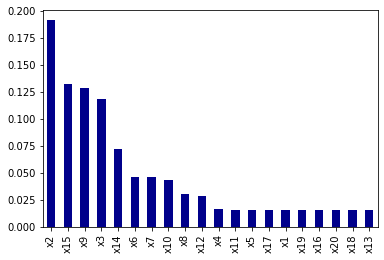

In [25]:
model = ExtraTreesClassifier()
model.fit(x_train,y_train)

feat_importances = pd.Series(model.feature_importances_, index=colsSelect2)
feat_importances.nlargest(20).plot(kind='bar',color='darkblue')
plt.show()

In [26]:
colsSelect2 = ['x2', 'x3','x6','x7','x8','x9','x10','x12','x14','x15']
x_train = np.array(df_train[colsSelect2])                
y_train = np.array(df_train["y"])   

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,test_size=0.3,random_state=1)
model=RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=3, n_estimators=900)
model.fit(x_train, y_train)
forest_pred = model.predict(x_test)
print('\n',confusion_matrix(y_test, forest_pred))
print('CLASSIFICATION REPORT FOR FEATURE SELECT1\n\n', classification_report(y_test, forest_pred))


 [[1495   28]
 [  33  364]]
CLASSIFICATION REPORT FOR FEATURE SELECT1

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1523
           1       0.93      0.92      0.92       397

    accuracy                           0.97      1920
   macro avg       0.95      0.95      0.95      1920
weighted avg       0.97      0.97      0.97      1920



<a id="t5."></a>
# ❤️  5. Model selection on scikit-learn

We've established a basic idea about this data so build to choose model. This model that we try to train and test data as below. We select the one that have high accuracy.

* LinearDiscriminantAnalysis
* QuadraticDiscriminantAnalysis
* AdaBoostClassifier
* BaggingClassifier
* ExtraTreesClassifier
* GradientBoostingClassifier
* RandomForestClassifier
* RidgeClassifier
* SGDClassifier
* BernoulliNB
* GaussianNB
* KNeighborsClassifier
* MLPClassifier
* LinearSVC
* NuSVC
* DecisionTreeClassifier
* ExtraTreeClassifier

Final the first choose is QuadraticDiscriminantAnalysis and second choose is RandomForestClassifier.

In [28]:
colsfinal = ['x2', 'x3','x6','x7','x8','x9','x10','x12','x14','x15']
x_train1 = np.array(df_train[colsfinal])                
y_train1 = np.array(df_train["y"]) 
x_test1 = np.array(df_test[colsfinal]) 

In [29]:
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('Extra Trees Ensemble', ExtraTreesClassifier(n_estimators=1000)))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Random Forest', RandomForestClassifier(n_estimators=1000)))
models.append(('Ridge', RidgeClassifier()))
models.append(('SGD', SGDClassifier(tol=1e-3, max_iter=10000)))
models.append(('BNB', BernoulliNB()))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('LSVC', LinearSVC(max_iter=100000)))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('ETC', ExtraTreeClassifier()))

DECISION_FUNCTIONS = {"Ridge", "SGD", "LSVC", "SVC"}

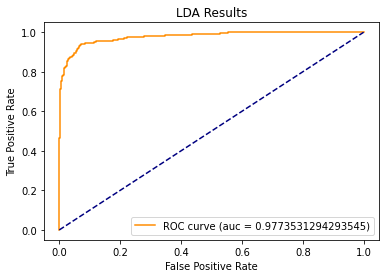

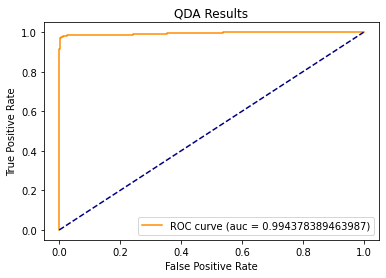

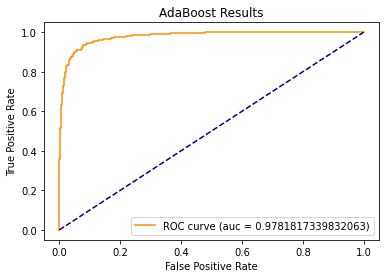

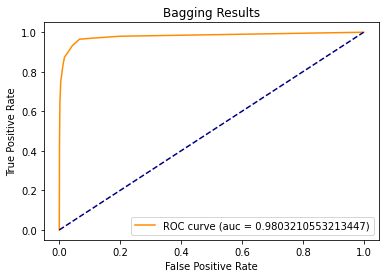

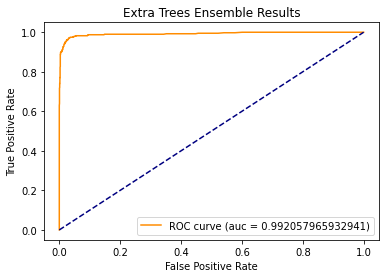

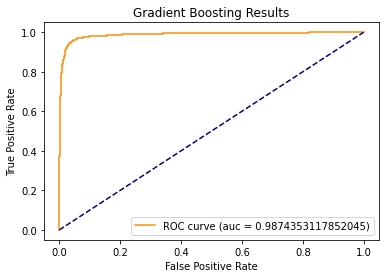

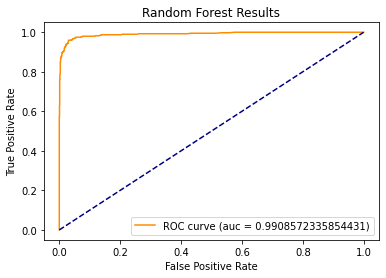

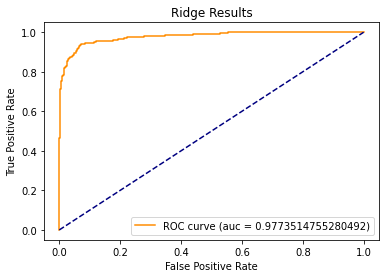

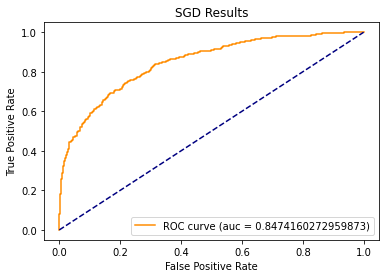

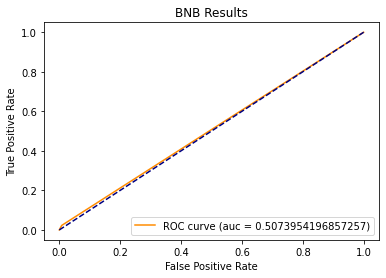

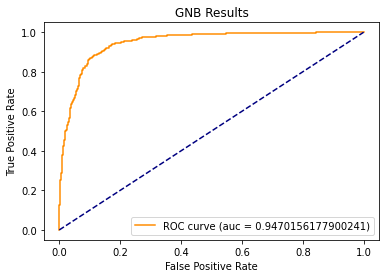

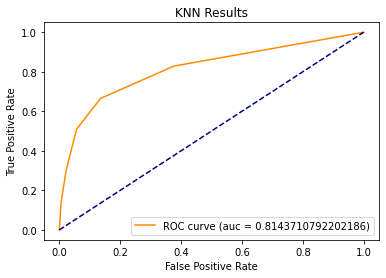

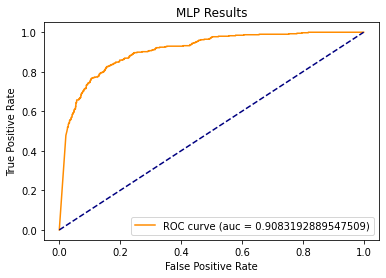

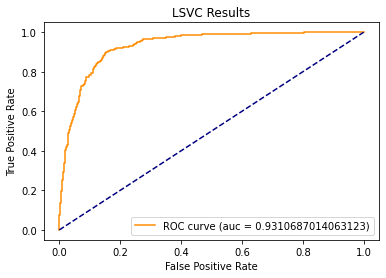

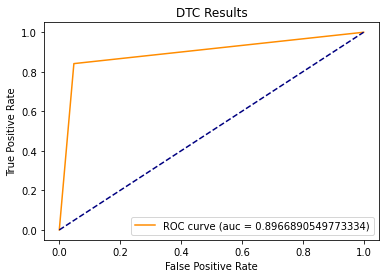

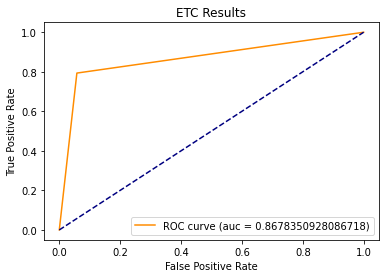

Best model is QDA


In [30]:
from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train1, y_train1,test_size=0.3,random_state=1)

best_model = None
best_model_name = ""
best_valid = 0
for name, model in models:
    model.fit(x_train1, y_train1)
    if name in DECISION_FUNCTIONS:
        proba = model.decision_function(x_test1)
    else:
        proba = model.predict_proba(x_test1)[:, 1]
    score = roc_auc_score(y_test1, proba)
    fpr, tpr, _  = roc_curve(y_test1, proba)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (auc = {score})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.title(f"{name} Results")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
    if score > best_valid:
        best_valid = score
        best_model = model
        best_model_name = name

print(f"Best model is {best_model_name}")

In [31]:
colsfinal = ['x2', 'x3','x6','x7','x8','x9','x10','x11,''x12','x14','x15']
x_train = np.array(df_train[cols])                
y_train = np.array(df_train["y"]) 
x_test = np.array(df_test[cols]) 

In [32]:
# ##1st submission model Public Score = 0.97542
# model=RandomForestClassifier(criterion='entropy',n_estimators = 900, max_depth = 9, random_state=1, oob_score=True, n_jobs=-1)
# model.fit(x_train,y_train)
# predictrain = model.predict(x_train)
# prediction7 = model.predict(x_test)

In [33]:
# ##2nd submission model Public Score = 0.99257
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train,y_train)
test_mse = clf.predict(x_test)

<a id="t6."></a>
# ❤️  6. Test and Submission

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,test_size=0.3,random_state=1)
clf.fit(x_train, y_train)
forest_pred = clf.predict(x_test)
print('\n',confusion_matrix(y_test, forest_pred))
print('CLASSIFICATION REPORT\n\n', classification_report(y_test, forest_pred))


 [[1516    7]
 [  12  385]]
CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1523
           1       0.98      0.97      0.98       397

    accuracy                           0.99      1920
   macro avg       0.99      0.98      0.98      1920
weighted avg       0.99      0.99      0.99      1920



In [35]:
submission['Expected'] =  test_mse
submission.to_csv('submission.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
